In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [167]:
def marg_mvn(mus,cov_mat,cols):
    del_cols= np.arange(len(mus))
    del_cols= del_cols[np.isin(del_cols,cols,invert=True)] 
    cov_mat= np.delete(np.delete(cov_mat,del_cols,0),del_cols,1)
    mus= np.delete(mus,del_cols)

    return mvn(mus,cov_mat)

def cond_mvn(mus,cov_mat,cols,vals):
    keep_cols= np.arange(len(mus))
    keep_cols= keep_cols[np.isin(keep_cols,cols,invert=True)] 
    ids= np.append(keep_cols,cols)
    mus= mus[ids]
    cov_mat= cov_mat[ids][:,ids]
    id_cut= len(keep_cols)
    S11= cov_mat[:id_cut,:id_cut]
    S12= cov_mat[:id_cut,id_cut:]
    S21= cov_mat[id_cut:,:id_cut]
    S22= cov_mat[id_cut:,id_cut:]
    S22_inv= np.linalg.inv(S22)
    mus= mus[:id_cut] + S12 @ S22_inv @ (vals-mus[id_cut:])
    cov_mat= S11 - S12 @ S22_inv @ S21



    return mvn(mus,cov_mat)



In [158]:
mus= np.array([1.,4.])
stds= np.array([[3.,2.]])
corr= np.array([[1.,.5],[.5,1.]])
#cov_mat= np.array([[9.,.5*3.*2.],[.5*3.*2.,4.]])
cov_mat= stds*corr*stds.T

In [160]:
print(mus,'\n',cov_mat)

[1. 4.] 
 [[9. 3.]
 [3. 4.]]


In [161]:
xs= np.linspace(-6,8,100)
ys= np.linspace(-1,8,100)

x_mesh,y_mesh= np.meshgrid(xs,ys)
poss= np.dstack((x_mesh,y_mesh))

rv= mvn(mus,cov_mat)
pdf= rv.pdf(poss)


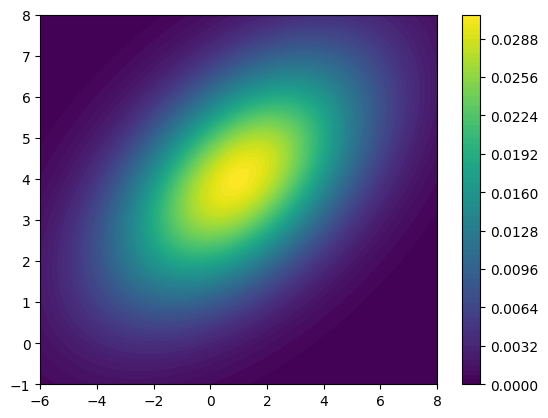

In [162]:
im=plt.contourf(x_mesh,y_mesh,pdf,levels=100,cmap='viridis')
plt.colorbar(im)
plt.show()

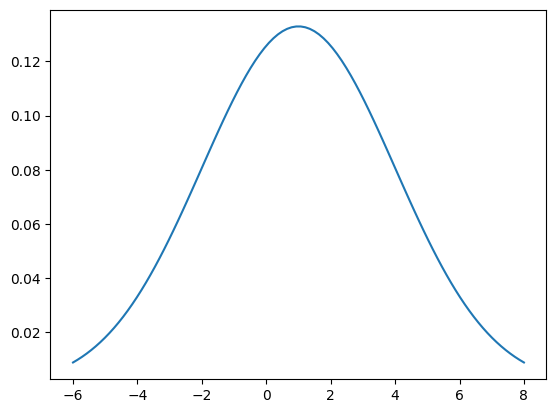

In [166]:
xs= np.linspace(-6,8,100)
marg= marg_mvn(mus,cov_mat,0)
marg_pdf= marg.pdf(xs)

plt.plot(xs,marg_pdf)

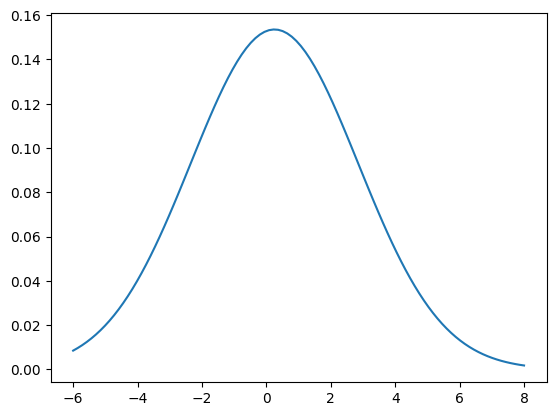

In [171]:
xs= np.linspace(-6,8,100)
y= 3.

cond= cond_mvn(mus,cov_mat,1,y)
cond_pdf= cond.pdf(xs)

plt.plot(xs,cond_pdf)